In [1]:
"""
심층 신경망으로 이미지 분류 모델을 생성
이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델을 생성
훈련에 필요한 데이터셋은 케라스 내장 데이터셋(Mnist) 가져와서 사용한다 , 

케라스의 datasets 패키지에 있는 데이터를 불러오기 위해 load_data()메소드를 사용
"""

'\n심층 신경망으로 이미지 분류 모델을 생성\n이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델을 생성\n훈련에 필요한 데이터셋은 케라스 내장 데이터셋(Mnist) 가져와서 사용한다 , \n\n케라스의 datasets 패키지에 있는 데이터를 불러오기 위해 load_data()메소드를 사용\n'

In [2]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [3]:
"""
X_train과 y_train은 각각 훈련 셋의 입력(x), 데이터와 출력(y) 데이터를 나타낸다
마찬가지로
x_test와 y_test는 검증 셋의 입력과 출력 데이터를 저장한다
"""
#load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
"""
훈련 셋에는 60000개의 데이터가, 검증 셋에는 10000개의 데이터가 저장되어 있다는 것을 확인할 수 있다. 
입력 데이터에 해당하는 x_train, x_test에는 mnist 손글씨 이미지 데이터가 저장되고, 배열의 shape은(데이터셋 크기, 28, 28)라는 것을 알 수 있다
여기서 shape의 첫번째는 데이터셋의 크기를 나타내며 28,28은 순서대로 이미지의 세로, 가로의 픽셀 크기를 나타낸다

즉 x_train에는 28 X 28 픽셀 크기의 정사각형 이미지 60000장이 저장되어 있고, x_test에는 10000장의 이미지가 저장되어 있는 것이다
각 입력 데이터에 대응되는 출력 데이터(정답) 또한 각각 60000개와 10000개가 1차원 벡터 형태로 정리되어 있는 것을 알 수 있다
"""
# 로드된 데이터셋 확인
print("train set:", x_train.shape, y_train.shape)
print("test set:", x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

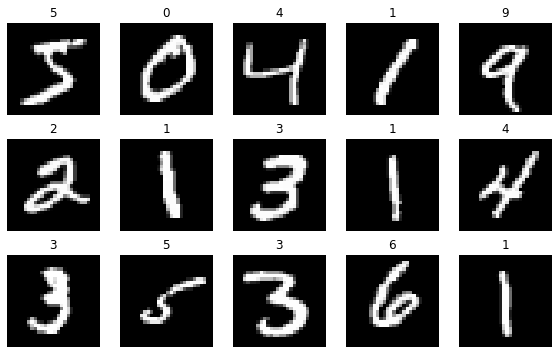

In [9]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i // 5, i % 5]
    #imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap="gray")
    ax.axis("off")
    ax.set_title(str(y_train[i]))
    
plt.tight_layout()
plt.show()

In [10]:
"""
데이터 전처리 

"""
#x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [11]:
"""
데이터를 확인해 보면 0~255 범위의 값으로 이루어진 것을 확인할 수 있다.
데이터의 범위를 0~1 사이의 값을 가지도록 정규화하기 위해서 데이터의 최대값인 255로 나눈다
"""
#픽셀 값의 최소/최대값 확인
print(f'정규화전 최소값: {x_train.min()}, 최대값:{x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f"정규화후 최솟값: {x_train.min()}, 최대값:{x_train.max()} ")

정규화전 최소값: 0, 최대값:255
정규화후 최솟값: 0.0, 최대값:1.0 


In [12]:
"""
검증 셋에도 동일한 방식으로 정규화 
"""
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [13]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [14]:
"""
Flatten 레이어

정규화가 끝난 x_train의 shape(60000, 28, 28)이다 
즉 정규화를 하더라도 개별 데이터 값의 범위는 축소되지만, 원본 배열의 형태는 그대로 유지함

샘플 이미지의 형태는 (28, 28)로 이루어져 있고 2차원 입력으로 볼 수 있다.
2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없다. Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야 한다.
따라서 다음 코드와 같이 이미지 데이터를 1차원으로 전처리하여 주입해야한다
"""
print(f"변경 전 shape:{x_train.shape} ")
print(f"1D(1차원)으로 shape변경 후:{x_train.reshape(60000, -1).shape}")

변경 전 shape:(60000, 28, 28) 
1D(1차원)으로 shape변경 후:(60000, 784)


In [15]:
"""
Flatten 레이어를 사용하면 다차원 데이터를 1차원으로 펼쳐주는 방법도 가능하다
Flatten 층을 적용한 결과 shape이 (60000, 784)로 출력되는것을 확인할 수 있다 - 784는 가로 세로 픽셀 수를 곱한 값(28 * 28 = 784)
"""
print(f"변경 전 shape: {x_train.shape}")

#Flatten 레이어 적용 후 shape 확인
print(f"Flatten 적용 후:{tf.keras.layers.Flatten()(x_train).shape}")

변경 전 shape: (60000, 28, 28)
Flatten 적용 후:(60000, 784)


In [16]:
"""
활성화 함수
활성화 함수는 입력을 비선형 출력으로 변환해주는 함수이다. 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 함
한편, 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국은 선형함수로 표현

자주 사용되는 활성화 함수로는 시그모디으(Sigmoid), 하이퍼볼릭 탄젠트(Hyperbolic Tangent 혹은 tanh), ReLU(Rectified Unit), Leaky ReLU 등이 있다

-이거는 함 검색해서 봐라

텐서플로 케라스 레이어에 활성화 함수를 적용하고 싶다면 다음과 같이 설정
Dense 레이어에 ReLU 활성화 함수를 적용하기 위해서는 activation 매개변수에 'relu' 문자열을 대입
"""
#Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation= "relu")

In [17]:
"""
별도의 층처럼 적용할 수도 있다
이렇게 별도의 층으로 적용하는 경우는 Dense 레이어 다음에 배치 정규화(Batch Normalization)를 적용한 후 활성화 함수를 적용하고자 할때 
많이 사용된다
즉 , 레이어 구성을 조금 더 관리하고 싶을때 구분하여 처리한다
"""
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation("relu")
])

In [18]:
"""
입력과 출력

딥러닝 모델을 만들 때는 첫 번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것이 일반적이다.
앞에서 x_train의 shape(60000, 28, 28) 배열이라는 것을 확인한 바 있다

여기서 데이터셋의 크기를 나타내는 60000이라는 숫자를 제외하고 이미지의 세로, 가로 형태를 나타내는 input_shape = (28, 28) 를 input_shape로 지정한다


분류 모델의 가장 마지막 레이어는 출력층이다. 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야한다 
mnist 는 0~9 까지 총 10개의 클래스로 이루어져 있기 때문에 마지막 출력층의 노드 개수는 10개가 되어야 한다
"""

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    #노드 = 10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [19]:
"""
출력층의 노드 개수가 2개 이상인 경우는 softmax 활성화 함수를 적용한다. 즉 다중 분류 문제에서는 softmax 활성화 함수를 사용해야한다
반면 이진 분류 모델의 출력층 노드 개수를 1개로 설정한 경우에는 sigmoid 활성화 함수를 적용해야한다 - (단, 이진 분류 모델이더라도 출력 레이어의
클래스를 원핫 인코딩으로 변환하여 노드 개수가 2개인 경우에는 softmax 함수를 사용한다)
"""
# 출력층 노드 = 1인 경우 sigmoid
tf.keras.layers.Dense(1, activation="sigmoid")

# 출력층 노드 = 2개 이상인 경우. softmax
tf.keras.layers.Dense(10, activation="softmax")

In [20]:
"""
###손실 함수

분류 모델의 손실함수는 모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련할 수 있다

이진 분류기(binary classifier) 생성 시 출력층의 노드 개수가 1이면 activation = "sigmoid"를 지정하며 손실함수는 "binary_crossentropy"를 지정하면 된다


"""
# 이진 분류(출력 노드 개수 =1, sigmoid 인 경우)
model.compile(loss="binary_crossentropy")

In [21]:
"""
출력층의 노드 개수가 2개 이상일 경우
"""
# y 가 원핫 벡터의 경우
# [ 0.. 0.. 0.. 1.. 0.. 1.. 0..]
model.compile(loss = "categorical_crossentropy")
# y 가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss = "sparse_categorical_crossentropy")

In [22]:
"""
mnist 손글씨 데이터셋의 손실 함수 loss 는 sparse_categorical_crossentropy 로 함
"""

'\nmnist 손글씨 데이터셋의 손실 함수 loss 는 sparse_categorical_crossentropy 로 함\n'

In [23]:
"""
옵티마이저

옵티마이저는 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법
일반적으로 많이 사용되는 알고리즘은 Adam이며 대체적으로 좋은 성능을 발휘하는 것으로 알려져 있다
"""
#클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = adam)

# 문자열로 지정
model.compile(optimizer="adam")

c:\programdata\anaconda3\envs\tensor1\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
"""
평가 지표
분류 모델에 대한 평가지표는 정확도를 나타내는 accuracy(또는 acc)가 가장 많이 사용되며 "auc", "precision", "recall"등의 지표도 많이 사용됨
모델 컴파일 단계에서 metrics 매개 변수에 파이썬 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표들을 동시에 참고할 수 있다.

평가지표도 옵티마이저와 마찬가지로 클래스 인스턴스로 지정하거나 문자열로 지정할 수 있다
다음 코드 예제를 보면, compile() 메소드의 metrics 속성에 평가지표를 설정하고 있다
"""
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer="adam",
             loss = "sparse_categorical_crossentropy",
             metrics = [acc])



In [25]:
# 문자열로 지정
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [27]:
"""
훈련
mnist 손글씨 데이터셋은 10000개로 구성된 별도의 검증 셋이 존재한다. 우리는 검증 셋을 (x_test, y_test)에 저장했다.
모델을 훈련할 때 검증 셋을 추가 지정하면, 매 epoch마다 훈련 손실과 검증 손실, 그리고 각 셋에 대한 평가지표를 나란히 출력한다.
검증 셋을 지정하는 방법은 validation_data 매개변수에 투플 형식의 검증 셋을 지정해주면 된다.
"""
#훈련
model.fit(x_train, y_train,
         #검증 셋 지정
         validation_data=(x_test, y_test),
         epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2363 - accuracy: 0.9280 - val_loss: 0.1573 - val_accuracy: 0.9491
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0917 - accuracy: 0.9724 - val_loss: 0.0831 - val_accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0657 - accuracy: 0.9797 - val_loss: 0.0863 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0496 - accuracy: 0.9843 - val_loss: 0.0727 - val_accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0397 - accuracy: 0.9872 - val_loss: 0.0837 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0804 - val_accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0842 - val_accuracy:

In [28]:
"""
평가 
10회의 epoch가 끝나고 훈련이 종료된 뒤 evaluate() 메소드로 모델 성능을 검증하고 평가 결과를 확인할 수 있다.
이때 검증 셋인 x_test, y_test를 함수에 전달한다
"""
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print("검증 셋 정확도:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0968 - accuracy: 0.9770
검증 셋 정확도: 0.9769999980926514


In [29]:
"""
예측

훈련된 모델로 새로운 이미지에 대한 분류 값을 예측하는 작업을 수행할 수 있다. predict() 메소드에 이미지 데이터를 넣어주면 모델의 예측 결과를 반환한다.
여기서는 예측에 필요한 새로운 데이터셋이 준비되어 있지 않기 때문에, 검증 데이터셋의 입력 데이터인 x_test를 사용한다
"""
# 예측
predictions = model.predict(x_test)

In [30]:
"""
predictions 변수에 모델이 예측한 분류 결과를 넘파이 배열 형태로 저장한다.  첫 번째 입력 이미지에 대한 분류 결과를 출력해보면 다음과 같이 10개의
확률값들이 출력되는 것을 확인할 수 있다.
"""
# 예측 결과 출력 7에 높은 확률값이 뜬다
predictions[0]

array([3.9478264e-11, 7.8939184e-09, 2.1468270e-10, 1.2853353e-09,
       1.4456354e-08, 6.3119452e-14, 1.8433604e-17, 9.9999988e-01,
       1.0884019e-12, 9.0931813e-08], dtype=float32)

In [31]:
"""
넘파이 배열의 argmax를 활용하여 가장 높은 확률값을 가지는 클래스 결과를 확인할 수 있다
"""
import numpy as np

#0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

#첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


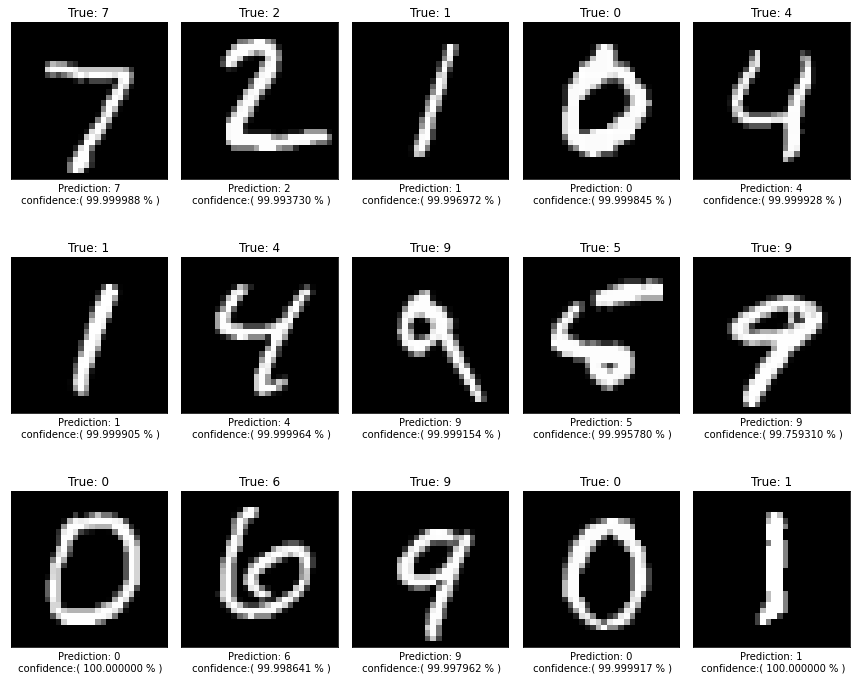

In [38]:
"""
matplotlib 시각화
"""
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence

#canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    #imshow로 이미지 시각화
    ax.imshow(img, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"True: {y_true}")
    ax.set_xlabel(f"Prediction: {y_pred}\n confidence:({confidence: 2f} % )")

plt.tight_layout()
plt.show()